In [52]:
 %%capture
! pip install underthesea==1.3.5

In [53]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import re
import seaborn as sns
import warnings

from sklearn import set_config
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from wordcloud import WordCloud
from underthesea import sent_tokenize,word_tokenize
set_config(display='diagram')
import dill 
import wordcloud 

In [54]:
df = pd.read_csv("/content/drive/MyDrive/DACN/DataSet/dataSet_lasted.csv")
df

,data,label
0,Trực tiếp Thái Sơn Bắc vs Sanvinest Khánh Hòa,0
1,Trực tiếp Sài Gòn FC vs Thái Sơn Nam,0
2,Ở cả 2 trận giao hữu gần nhất của của CLB Boru...,0
3,Video: Johor 1-4 Dortmund,0
4,CLB Công an Hà Nội thông báo chiêu mộ thành cô...,0
...,...,...
4279,Chữa hết bệnh câm cho vợ người chồng cay đắng ...,1
4280,YÊU RÂU XANH (P51): Câu chuyện động trời sau t...,1
4281,CÁC BẠN TIN KHÔNG MIỄN PHÍ 100 CHIẾN DỊCH QUẢN...,1
4282,Thân gởi các bạn yêu quý tôi nghĩ các bạn nên ...,1


In [55]:
x = df['data']
y = df['label']

train_X_df, val_X_df, train_Y_sr, val_Y_sr = train_test_split(
    x, y, 
    test_size = 0.2, 
    stratify = y
)

In [56]:
train_X_df
train_X_df.to_csv('/content/drive/MyDrive/DACN/train_X_df.csv')

In [57]:
with open("/content/drive/MyDrive/DACN/vn-stopword.txt",encoding='utf-8') as file:
    stopwords = file.readlines()
    stopwords = [word.rstrip() for word in stopwords]

punctuations = '''!()-–=[]{}“”‘’;:'"|\,<>./?@#$%^&*_~'''

special_chars = ['\n', '\t']

regex = re.compile(
        r'^(?:http|ftp)s?://' # http:// or https://
        r'(?:(?:[A-Z0-9](?:[A-Z0-9-]{0,61}[A-Z0-9])?\.)+(?:[A-Z]{2,6}\.?|[A-Z0-9-]{2,}\.?)|' # domain
        r'localhost|' # localhost
        r'\d{1,3}\.\d{1,3}\.\d{1,3}\.\d{1,3})' # ip
        r'(?::\d+)?' # port
        r'(?:/?|[/?]\S+)$', re.IGNORECASE)   

In [58]:
def tokenize(text):
    tokenized_text = word_tokenize(text)
    return tokenized_text

def is_punctuation(token):
    global punctuations
    return True if token in punctuations else False

def is_special_chars(token):
    global special_chars
    return True if token in special_chars else False

def is_link(token):
    return re.match(regex, token) is not None

def lowercase(token):
    return token.lower()

def is_stopword(token):
    global stopwords
    return True if token in stopwords else False
def vietnamese_text_preprocessing(text):
    tokens = tokenize(text)
    tokens = [token for token in tokens if not is_punctuation(token)]
    tokens = [token for token in tokens if not is_special_chars(token)]
    tokens = [token for token in tokens if not is_link(token)]
    tokens = [lowercase(token) for token in tokens]
    tokens = [token for token in tokens if not is_stopword(token)]
    return tokens

In [59]:
demo_vi = '"Cuộc điều tra đang diễn ra và chúng ta cần chờ kết quả cuối cùng. Nhưng chúng tôi không thấy dấu hiệu nào cho thấy đây là cuộc tấn công có chủ ý. Phân tích sơ bộ cho thấy sự việc nhiều khả năng do tên lửa phòng không Ukraine bắn ra để bảo vệ lãnh thổ Ukraine trước các cuộc tấn công bằng tên lửa hành trình Nga", Tổng thư ký NATO Stoltenberg nói ngày 16/11.'

demo_text_to_tokens = vietnamese_text_preprocessing(demo_vi)
print(demo_text_to_tokens)

['điều tra', 'diễn', 'chờ', 'kết quả', 'dấu hiệu', 'tấn công', 'chủ ý', 'phân tích', 'sơ bộ', 'khả năng', 'lửa', 'phòng', 'ukraine', 'bắn', 'bảo vệ', 'lãnh thổ', 'ukraine', 'tấn công', 'lửa', 'hành trình', 'nga', 'tổng thư ký', 'nato stoltenberg', '16/11']


In [60]:
print("Shape: ",df.shape)
print("Columns: ", df.columns.tolist())

Shape:  (4284, 2)
Columns:  ['data', 'label']


In [61]:
df.dtypes

data     object
label     int64
dtype: object

In [62]:
df.isna().sum()

data     0
label    0
dtype: int64

In [63]:
df.label.value_counts()

0    3315
1     969
Name: label, dtype: int64

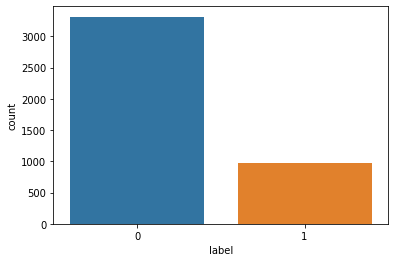

In [64]:
warnings.simplefilter(action="ignore", category=FutureWarning)
sns.countplot(df.label)

In [65]:
def split_word(x):return len(x.split())
len_text = df['data'].apply(split_word)
len_text
# len_text.describe()

0          9
1          9
2        592
3          4
4        377
        ... 
4279    1712
4280     786
4281     182
4282    1471
4283     185
Name: data, Length: 4284, dtype: int64

In [66]:
fake_news_df = df[df['label'] == 1]
real_news_df = df[df['label'] == 0]

In [67]:
def visulize_frequency_word(df, title):
    words_df = []
    df['data'].apply(lambda x: words_df.extend(vietnamese_text_preprocessing(x)))
    wordcloud = WordCloud(background_color="white").generate(' '.join(words_df))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(title)
    plt.show()

In [68]:
# visulize_frequency_word(fake_news_df,"Visulize Frequency Word in Fake News")

In [69]:
# visulize_frequency_word(real_news_df,"Visulize Frequency Word in Real News")

In [70]:
train_X_df = [' '.join(vietnamese_text_preprocessing(sent)) for sent in train_X_df]
val_X_df = [' '.join(vietnamese_text_preprocessing(sent)) for sent in val_X_df]

In [71]:
tfvect = TfidfVectorizer(max_df=0.7)
tfid_x_train = tfvect.fit_transform(train_X_df)
tfid_x_test = tfvect.transform(val_X_df)

In [72]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score

In [73]:
def decision_tree(X_train, X_test, y_train):
  tree = DecisionTreeClassifier(random_state=0)
  tree.fit(X_train, y_train)
  y_pred_tree = tree.predict(X_test)
  return y_pred_tree, tree
def svc(X_train, X_test, y_train):
  clf_svc = svm.LinearSVC()
  clf_svc.fit(X_train, y_train)
  y_pred_svc = clf_svc.predict(X_test)
  return y_pred_svc, clf_svc
def naivebayes(X_train, X_test, y_train):
  nb = MultinomialNB()
  nb.fit(X_train, y_train)
  y_pred_nb = nb.predict(X_test)
  return y_pred_nb, nb

In [74]:
pred1_svc, model1_svc = svc(tfid_x_train, tfid_x_test, train_Y_sr)
pred1_tree, model1_tree = decision_tree(tfid_x_train, tfid_x_test, train_Y_sr)
pred1_nb, model1_nb = naivebayes(tfid_x_train, tfid_x_test, train_Y_sr)
def evaluate(pred, true):
  #print('-----------------------------------------------------')
  acc = accuracy_score(pred, true)
  print(classification_report(pred, true))
  print('Accuracy:', acc)
  auc = roc_auc_score(true, pred)
  print('AUC:', auc)
  print('-----------------------------------------------------')
  print()
  return acc, auc

print('SVC:')
acc1_svc, auc1_svc = evaluate(pred1_svc, val_Y_sr)
print('Decision Tree:')
acc1_tree, auc1_tree = evaluate(pred1_tree, val_Y_sr)
print('Naive Bayes:')
acc1_nb, auc1_nb = evaluate(pred1_nb, val_Y_sr)

SVC:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       661
           1       1.00      0.99      0.99       196

    accuracy                           1.00       857
   macro avg       1.00      0.99      1.00       857
weighted avg       1.00      1.00      1.00       857

Accuracy: 0.9976662777129521
AUC: 0.9984917043740573
-----------------------------------------------------

Decision Tree:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       668
           1       0.95      0.98      0.97       189

    accuracy                           0.98       857
   macro avg       0.97      0.98      0.98       857
weighted avg       0.99      0.98      0.98       857

Accuracy: 0.9848308051341891
AUC: 0.9737875324594549
-----------------------------------------------------

Naive Bayes:
              precision    recall  f1-score   support

           0       1.00      0.90      0.9

In [75]:
out_tfidf = open("/content/drive/MyDrive/DACN/Items/tfidf_vector.pkl",mode = "wb")
dill.dump(tfvect,out_tfidf)
out_tfidf.close()

In [76]:
out_svc = open("/content/drive/MyDrive/DACN/Items/svc-model.pkl",mode = "wb")
dill.dump(model1_svc,out_svc)
out_svc.close()

In [77]:
out_nb = open("/content/drive/MyDrive/DACN/Items/nb-model.pkl",mode = "wb")
dill.dump(model1_nb,out_nb)
out_nb.close()

In [78]:
out_tree = open("/content/drive/MyDrive/DACN/Items/tree-model.pkl",mode = "wb")
dill.dump(model1_tree,out_tree)
out_tree.close()

In [476]:
with open('/content/drive/MyDrive/DACN/Items/svc-model.pkl', 'rb') as in_strm:
    saved_svc_model = dill.load(in_strm)
with open('/content/drive/MyDrive/DACN/Items/nb-model.pkl', 'rb') as in_strm:
    saved_nb_model = dill.load(in_strm)
with open('/content/drive/MyDrive/DACN/Items/tree-model.pkl', 'rb') as in_strm:
    saved_tree_model = dill.load(in_strm)
with open('/content/drive/MyDrive/DACN/Items/tfidf_vector.pkl', 'rb') as in_strm:
    saved_tfidf = dill.load(in_strm)

text = ' '.join(vietnamese_text_preprocessing('Quận 12 thông báo tiêm vắc xin Trung Quốc dân bỏ về hết'))
# text_real = ' '.join(vietnamese_text_preprocessing('Chiến thắng 2-1 của Man Utd trước Fulham'))
pd_pred = pd.DataFrame()
# tfid_text = saved_tfidf.transform([text])
tfid_text_real = saved_tfidf.transform([text])
print('Naive Bayes predict: ')
pred_result_nb = saved_nb_model.predict(tfid_text_real)[0]
print(pred_result_nb)
print('Decision Tree predict: ')
pred_result_tree = saved_tree_model.predict(tfid_text_real)[0]
print(pred_result_tree)
print('SVC predict: ')
pred_result_svc = saved_svc_model.predict(tfid_text_real)[0]
print(pred_result_svc)

Naive Bayes predict: 
1
Decision Tree predict: 
1
SVC predict: 
1


In [441]:
import tensorflow as tf 
import re 
from tensorflow.keras.preprocessing.text import Tokenizer
import tensorflow as tf
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score
import pickle

In [442]:

max_vocab = 45000
tokenizer = Tokenizer(num_words=max_vocab)
tokenizer.fit_on_texts(train_X_df)


# train_X_df, val_X_df, train_Y_sr, val_Y_sr

In [443]:
# tokenize the text into vectors 
X_train = tokenizer.texts_to_sequences(train_X_df)
X_test = tokenizer.texts_to_sequences(val_X_df)

In [444]:
X_train = tf.keras.preprocessing.sequence.pad_sequences(X_train, padding='post', maxlen=256)
X_test = tf.keras.preprocessing.sequence.pad_sequences(X_test, padding='post', maxlen=256)

In [445]:
# saving
with open('/content/drive/MyDrive/DACN/Items/im/v2/tokenizer.pkl', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [446]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(max_vocab, 32),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,  return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(16)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1)
])

model.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_18 (Embedding)    (None, None, 32)          1440000   
                                                                 
 bidirectional_40 (Bidirecti  (None, None, 128)        49664     
 onal)                                                           
                                                                 
 bidirectional_41 (Bidirecti  (None, 32)               18560     
 onal)                                                           
                                                                 
 dense_39 (Dense)            (None, 64)                2112      
                                                                 
 dropout_18 (Dropout)        (None, 64)                0         
                                                                 
 dense_40 (Dense)            (None, 1)               

In [447]:
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

history = model.fit(X_train, train_Y_sr, epochs=20,validation_split=0.1, batch_size=30, shuffle=True, callbacks=[early_stop])
# history = model.fit(X_train, train_Y_sr, epochs=20,validation_split=0.1, batch_size=30, shuffle=True)

Epoch 1/20
103/103 [==============================] - 11s 51ms/step - loss: 0.6372 - accuracy: 0.7720 - val_loss: 0.5118 - val_accuracy: 0.7901
Epoch 2/20
103/103 [==============================] - 4s 35ms/step - loss: 0.3809 - accuracy: 0.7720 - val_loss: 0.2153 - val_accuracy: 0.7901
Epoch 3/20
103/103 [==============================] - 4s 35ms/step - loss: 0.1954 - accuracy: 0.7912 - val_loss: 0.1743 - val_accuracy: 0.9096
Epoch 4/20
103/103 [==============================] - 4s 37ms/step - loss: 0.1475 - accuracy: 0.9196 - val_loss: 0.1601 - val_accuracy: 0.9417
Epoch 5/20
103/103 [==============================] - 4s 35ms/step - loss: 0.1144 - accuracy: 0.9660 - val_loss: 0.1426 - val_accuracy: 0.9446
Epoch 6/20
103/103 [==============================] - 4s 36ms/step - loss: 0.0933 - accuracy: 0.9711 - val_loss: 0.1099 - val_accuracy: 0.9679
Epoch 7/20
103/103 [==============================] - 5s 49ms/step - loss: 0.0797 - accuracy: 0.9796 - val_loss: 0.1028 - val_accuracy: 0.976

In [448]:
model.evaluate(X_test, val_Y_sr)

27/27 [==============================] - 0s 16ms/step - loss: 0.0364 - accuracy: 0.9930


[0.036380648612976074, 0.9929988384246826]

In [449]:
pred = model.predict(X_test)
binary_predictions = []

for i in pred:
    if i >= 0.5:
        binary_predictions.append(1)
    else:
        binary_predictions.append(0) 

27/27 [==============================] - 2s 15ms/step


In [450]:
print('Accuracy on testing set:', accuracy_score(binary_predictions, val_Y_sr))
print('Precision on testing set:', precision_score(binary_predictions, val_Y_sr))
print('Recall on testing set:', recall_score(binary_predictions, val_Y_sr))

Accuracy on testing set: 0.9929988331388565
Precision on testing set: 0.979381443298969
Recall on testing set: 0.9895833333333334


In [451]:
model.save("/content/drive/MyDrive/DACN/Items/im/v2/rnn-model_final.h5")

In [452]:
from keras.models import load_model
model_saved = load_model("/content/drive/MyDrive/DACN/Items/im/v2/rnn-model_final.h5")

In [453]:
with open('/content/drive/MyDrive/DACN/Items/im/v2/tokenizer.pkl', 'rb') as handle:
    tokenizer_saved = pickle.load(handle)

In [454]:
text = ' '.join(vietnamese_text_preprocessing('Chiến thắng 2-1 của Man Utd trước Fulham'))
text = ' '.join(vietnamese_text_preprocessing('Man Utd 2-1 Fulham'))
text 
# Predict
X_test_text = tokenizer.texts_to_sequences([text])
X_test_text = tf.keras.preprocessing.sequence.pad_sequences(X_test_text, padding='post', maxlen=256)
pred_text = model.predict(X_test_text)[0][0]
pred_text

1/1 [==============================] - 0s 37ms/step


-0.24212238

In [455]:
text = ' '.join(vietnamese_text_preprocessing('Chiến thắng 2-1 của Man Utd trước Fulham'))
# text = ' '.join(vietnamese_text_preprocessing('Man Utd 2-1 Fulham'))
text
# Predict
X_test_text = tokenizer_saved.texts_to_sequences([text])
X_test_text = tf.keras.preprocessing.sequence.pad_sequences(X_test_text, padding='post', maxlen=256)
pred_text = model_saved.predict(X_test_text)[0][0]
pred_text

1/1 [==============================] - 1s 1s/step


-4.581614

In [456]:
text = ' '.join(vietnamese_text_preprocessing('Quận 12 thông báo tiêm vắc xin Trung Quốc, dân bỏ về hết'))
# text = ' '.join(vietnamese_text_preprocessing('Dân bỏ về hết khi nghe tiêm vacxin Trung Quốc'))
text
# Predict
X_test_text = tokenizer.texts_to_sequences([text])
X_test_text = tf.keras.preprocessing.sequence.pad_sequences(X_test_text, padding='post', maxlen=256)
pred_text = model.predict(X_test_text)[0][0]
pred_text

1/1 [==============================] - 0s 36ms/step


4.483138

In [457]:
text = ' '.join(vietnamese_text_preprocessing('Quận 12 thông báo tiêm vắc xin Trung Quốc, dân bỏ về hết'))
# text = ' '.join(vietnamese_text_preprocessing('Dân bỏ về hết khi nghe tiêm vacxin Trung Quốc'))
text
# Predict
X_test_text = tokenizer_saved.texts_to_sequences([text])
X_test_text = tf.keras.preprocessing.sequence.pad_sequences(X_test_text, padding='post', maxlen=256)
pred_text = model_saved.predict(X_test_text)[0][0]
pred_text

1/1 [==============================] - 0s 38ms/step


4.483138

In [458]:
from keras.models import load_model
model_saved1 = load_model("/content/drive/MyDrive/DACN/Items/im_cm/v1/rnn-model_final.h5")

In [459]:
model_saved1.evaluate(X_test, val_Y_sr)

27/27 [==============================] - 2s 22ms/step - loss: 0.0436 - accuracy: 0.9930


[0.043592892587184906, 0.9929988384246826]

In [460]:
pred1 = model_saved1.predict(X_test)
binary_predictions1 = []

for i in pred1:
    if i >= 0.5:
        binary_predictions1.append(1)
    else:
        binary_predictions1.append(0) 

27/27 [==============================] - 2s 16ms/step


In [461]:
print('Accuracy on testing set:', accuracy_score(binary_predictions1, val_Y_sr))
print('Precision on testing set:', precision_score(binary_predictions1, val_Y_sr))
print('Recall on testing set:', recall_score(binary_predictions1, val_Y_sr))

Accuracy on testing set: 0.9929988331388565
Precision on testing set: 0.9742268041237113
Recall on testing set: 0.9947368421052631


In [462]:
from keras.models import load_model
model_saved2 = load_model("/content/drive/MyDrive/DACN/Items/im_cm/v2/rnn-model_final.h5")

In [463]:
model_saved2.evaluate(X_test, val_Y_sr)

27/27 [==============================] - 2s 22ms/step - loss: 0.0341 - accuracy: 0.9907


[0.03410378098487854, 0.9906651377677917]

In [464]:
pred2 = model_saved2.predict(X_test)
binary_predictions2 = []

for i in pred2:
    if i >= 0.5:
        binary_predictions2.append(1)
    else:
        binary_predictions2.append(0) 

27/27 [==============================] - 2s 17ms/step


In [465]:
print('Accuracy on testing set:', accuracy_score(binary_predictions2, val_Y_sr))
print('Precision on testing set:', precision_score(binary_predictions2, val_Y_sr))
print('Recall on testing set:', recall_score(binary_predictions2, val_Y_sr))

Accuracy on testing set: 0.9906651108518086
Precision on testing set: 0.9690721649484536
Recall on testing set: 0.9894736842105263


In [466]:
from keras.models import load_model
model_saved3 = load_model("/content/drive/MyDrive/DACN/Items/im/rnn-model_final.h5")

In [467]:
model_saved3.evaluate(X_test, val_Y_sr)

27/27 [==============================] - 2s 21ms/step - loss: 0.0241 - accuracy: 0.9942


[0.02412124164402485, 0.9941657185554504]

In [468]:
pred3 = model_saved3.predict(X_test)
binary_predictions3 = []

for i in pred3:
    if i >= 0.5:
        binary_predictions3.append(1)
    else:
        binary_predictions3.append(0) 

27/27 [==============================] - 2s 15ms/step


In [469]:
print('Accuracy on testing set:', accuracy_score(binary_predictions3, val_Y_sr))
print('Precision on testing set:', precision_score(binary_predictions3, val_Y_sr))
print('Recall on testing set:', recall_score(binary_predictions3, val_Y_sr))

Accuracy on testing set: 0.9941656942823804
Precision on testing set: 0.9742268041237113
Recall on testing set: 1.0


In [470]:
from keras.models import load_model
model_saved4 = load_model("/content/drive/MyDrive/DACN/Items/rnn-model_final.h5")

In [471]:
model_saved4.evaluate(X_test, val_Y_sr)

27/27 [==============================] - 2s 22ms/step - loss: 0.0304 - accuracy: 0.9907


[0.03042442724108696, 0.9906651377677917]

In [472]:
pred4 = model_saved4.predict(X_test)
binary_predictions4 = []

for i in pred4:
    if i >= 0.5:
        binary_predictions4.append(1)
    else:
        binary_predictions4.append(0) 

27/27 [==============================] - 2s 15ms/step


In [473]:
print('Accuracy on testing set:', accuracy_score(binary_predictions4, val_Y_sr))
print('Precision on testing set:', precision_score(binary_predictions4, val_Y_sr))
print('Recall on testing set:', recall_score(binary_predictions4, val_Y_sr))

Accuracy on testing set: 0.9906651108518086
Precision on testing set: 0.9690721649484536
Recall on testing set: 0.9894736842105263
